Week 5:

Build deep neural network to any classification problem and compare its accuracy 
to logistic regression.

In [ ]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [3]:


# [A] Load and preprocess real data
df = pd.read_csv("./datasets/week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Cell 3: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("🔸 Logistic Regression Accuracy:", acc_logreg)


🔸 Logistic Regression Accuracy: 0.9649122807017544


C:\Users\Sujit\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Cell 4: Simple NN with TensorFlow
dnn = Sequential([
    Input(shape=(30,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train with validation
history = dnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


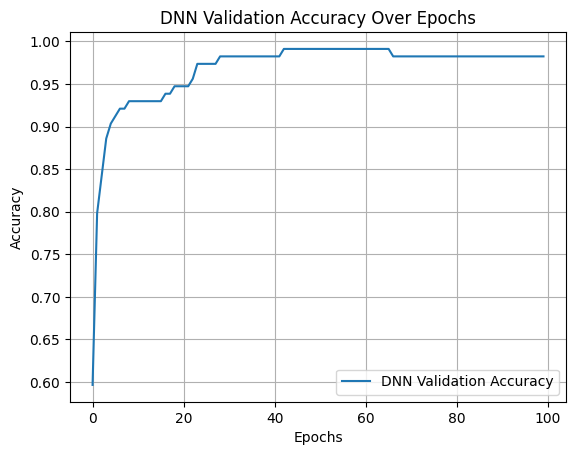

In [6]:
# Cell 5: Plot accuracy curve
plt.plot(history.history['val_accuracy'], label='DNN Validation Accuracy')
plt.title("DNN Validation Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Cell 6: Final Accuracy Printout
dnn_acc = dnn.evaluate(X_test, y_test, verbose=0)[1]

print(f"🔹 Logistic Regression Accuracy : {acc_logreg:.4f}")
print(f"🔹 DNN Accuracy                 : {dnn_acc:.4f}")


🔹 Logistic Regression Accuracy : 0.9649
🔹 DNN Accuracy                 : 0.9825
